# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [57]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides_by_city = pyber_data_df.groupby(pyber_data_df['type']).count()['ride_id']
total_rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [27]:
# 2. Get the total drivers for each city type
x = pyber_data_df.groupby(pyber_data_df['city']).first()[['type','driver_count']]
total_drivers_by_city = x.groupby(x['type']).sum()['driver_count']
total_drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [24]:
#  3. Get the total amount of fares for each city type
total_fare_by_city = pyber_data_df.groupby(pyber_data_df['type']).sum()['fare']
total_fare_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare_by_city/total_rides_by_city
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [29]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_by_city/total_drivers_by_city
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [37]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
                "Total Rides" : total_rides_by_city,
                "Total Drivers" : total_drivers_by_city,
                "Total Fares" : total_fare_by_city,
                "Average Fare per Ride" : avg_fare_per_ride,
                "Average Fare per Driver" : avg_fare_per_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [38]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [39]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [40]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [54]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_type_date_df = pyber_data_df.groupby([pyber_data_df['type'],pyber_data_df['date']]).sum()
pyber_type_date_df.drop(columns=['ride_id','driver_count'], inplace = True)
pyber_type_date_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [58]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [61]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_data_df.pivot(
                index ='date',
                columns = 'type',
                values = 'fare'
                )
pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [153]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_pivot_jan_apr_19 = pyber_pivot.loc[(pyber_pivot.index >= '2019-01-01') & (pyber_pivot.index <= '2019-04-30')]
pyber_pivot_jan_apr_19

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [114]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_pivot_jan_apr_19.index = pd.to_datetime(pyber_pivot_jan_apr_19.index)

In [115]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_jan_apr_19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [150]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_pivot_week_df = pyber_pivot_jan_apr_19.resample('W-MON').sum()
pyber_pivot_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
...,...,...,...
2019-04-01,292.06,1061.82,1970.03
2019-04-08,453.42,1034.28,2101.04
2019-04-15,214.60,821.52,2579.51


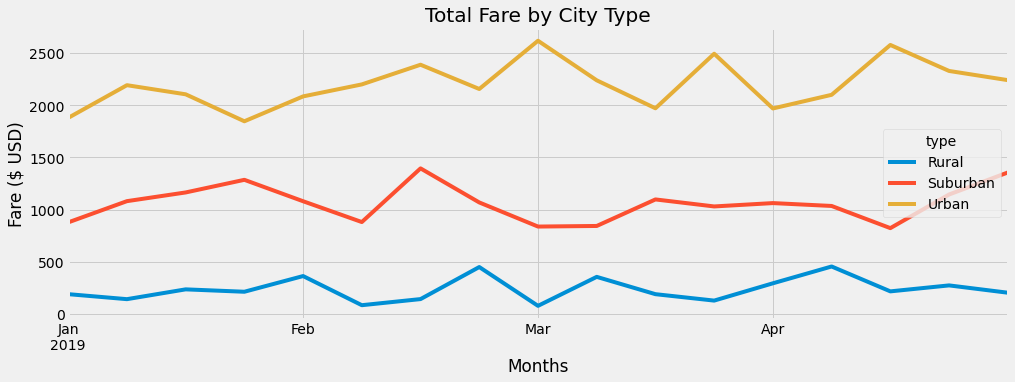

In [154]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fare_plot = pyber_pivot_week_df.plot(kind='line', figsize=(15,5))
fare_plot.set_xlabel('Months')
fare_plot.set_ylabel('Fare ($ USD)')
fare_plot.set_title('Total Fare by City Type')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig('../Resources/PyBer_fare_summary.png')